In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
# path /content/drive/MyDrive/datasets/PlantVillage

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/datasets/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names

In [ ]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

why 68?
because dataset now consists of 68 batches and each batch consists of 32 images

In [ ]:
len(dataset)

68

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape) #batch,dimension,dimension,rgb
  print(label_batch) #label(belongs to ehich class)

(32, 256, 256, 3)
tf.Tensor([0 1 2 0 1 1 1 2 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0], shape=(32,), dtype=int32)


In [ ]:
print(image_batch[0].numpy())

[[[181. 179. 192.]
  [157. 155. 168.]
  [167. 165. 178.]
  ...
  [ 88.  86.  99.]
  [ 90.  88. 101.]
  [ 96.  94. 107.]]

 [[159. 157. 170.]
  [150. 148. 161.]
  [162. 160. 173.]
  ...
  [ 87.  85.  98.]
  [ 90.  88. 101.]
  [ 96.  94. 107.]]

 [[158. 156. 169.]
  [162. 160. 173.]
  [174. 172. 185.]
  ...
  [ 99.  97. 110.]
  [ 94.  92. 105.]
  [ 94.  92. 105.]]

 ...

 [[130. 128. 141.]
  [131. 129. 142.]
  [141. 139. 152.]
  ...
  [105. 102. 111.]
  [104. 101. 110.]
  [101.  98. 107.]]

 [[125. 123. 136.]
  [123. 121. 134.]
  [150. 148. 161.]
  ...
  [104. 101. 110.]
  [105. 102. 111.]
  [108. 105. 114.]]

 [[151. 149. 162.]
  [153. 151. 164.]
  [181. 179. 192.]
  ...
  [117. 114. 123.]
  [116. 113. 122.]
  [121. 118. 127.]]]


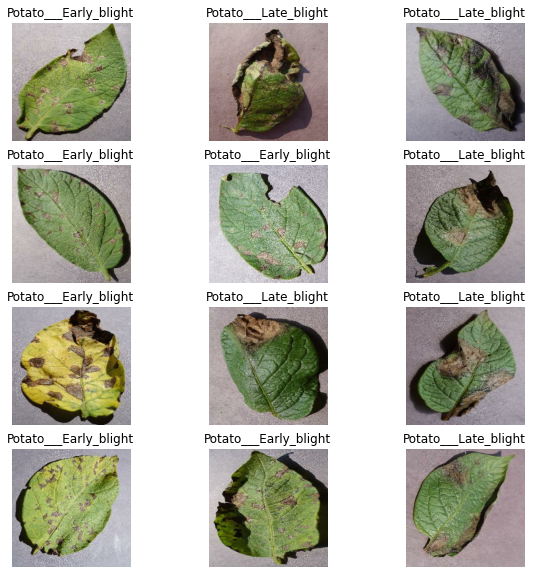

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
      ax = plt.subplot(4,3,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size,seed = 1)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)   

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    # layers.Conv2D(no. of layers,FilterSize,activation,input_shape)
    layers.Conv2D(32, (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose=1,
    epochs = 50
)

Epoch 1/50
54/54 [==============================] - 174s 166ms/step - loss: 0.9147 - accuracy: 0.4942 - val_loss: 0.8188 - val_accuracy: 0.5625
Epoch 2/50
54/54 [==============================] - 5s 92ms/step - loss: 0.7977 - accuracy: 0.6013 - val_loss: 0.7238 - val_accuracy: 0.6719
Epoch 3/50
54/54 [==============================] - 5s 91ms/step - loss: 0.5976 - accuracy: 0.7529 - val_loss: 0.5145 - val_accuracy: 0.7708
Epoch 4/50
54/54 [==============================] - 5s 91ms/step - loss: 0.3951 - accuracy: 0.8420 - val_loss: 0.3455 - val_accuracy: 0.9010
Epoch 5/50
54/54 [==============================] - 5s 90ms/step - loss: 0.4711 - accuracy: 0.8154 - val_loss: 0.3833 - val_accuracy: 0.8750
Epoch 6/50
54/54 [==============================] - 5s 90ms/step - loss: 0.2882 - accuracy: 0.8860 - val_loss: 0.4879 - val_accuracy: 0.7917
Epoch 7/50
54/54 [==============================] - 5s 91ms/step - loss: 0.1876 - accuracy: 0.9288 - val_loss: 0.1881 - val_accuracy: 0.9427
Epoch 8/50

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 33ms/step - loss: 0.0641 - accuracy: 0.9766


In [ ]:
scores

[0.06407906115055084, 0.9765625]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

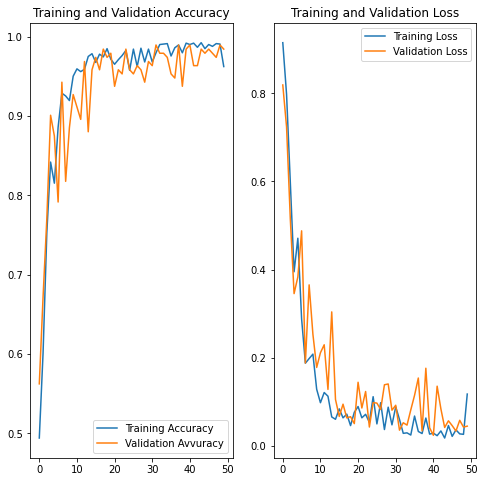

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Avvuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [ ]:
import numpy as np

first image to predict
first image's actual label: Potato___Early_blight
1/1 [==============================] - 0s 135ms/step
Potato___Early_blight


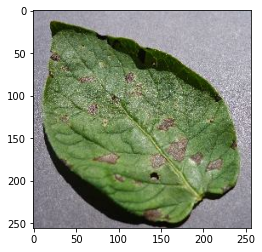

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print("first image's actual label:",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print(class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


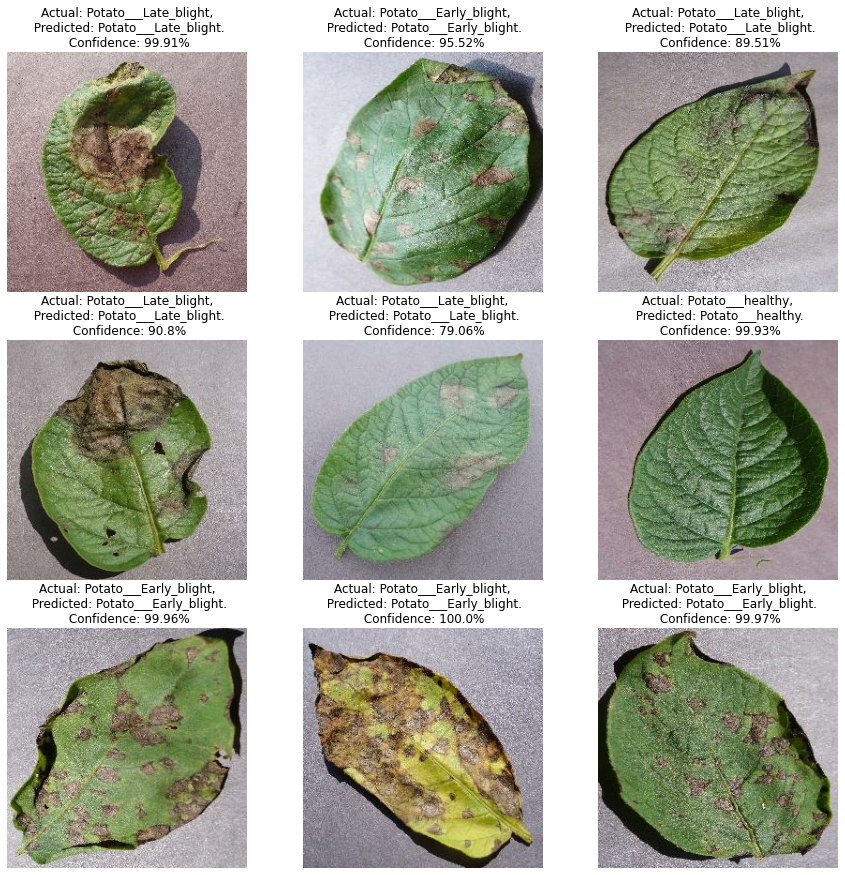

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os

model.save("/content/drive/MyDrive/my_model")